# Temporature forecast

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in the dataset

In [2]:
dataset = pd.read_csv('temp.csv')
print(dataset.columns)
dataset.head()

Index(['Year', 'Month', 'Day', 'Date', 'PPT. ', 'Av temp', 'Tmax', 'Tmin'], dtype='object')


,Year,Month,Day,Date,PPT.,Av temp,Tmax,Tmin
0,1901,1,1,01/01/1901,0.0,2.1,3.5,0.6
1,1901,1,2,02/01/1901,0.0,4.0,7.2,0.7
2,1901,1,3,03/01/1901,0.0,3.0,6.7,-0.7
3,1901,1,4,04/01/1901,0.0,3.7,7.9,-0.6
4,1901,1,5,05/01/1901,0.0,-0.3,1.2,-1.7


数据表中：
- Year, Month, Day, Date 分别表示的具体的时间
- PPT. 表示日降水量
- Av temp 表示日平均气温
- Tmax 表示日最高气温 
- Tmin 表示日最低气温

In [ ]:
# 统计指标
print('数据维度:', dataset.shape)
dataset.describe()

In [6]:
# 数据清洗，Date、Tmax、Tmin与target无关
dataset = dataset.drop(columns='Date')
dataset = dataset.drop(columns='Tmax')
dataset = dataset.drop(columns='Tmin')

In [ ]:
# 通过1901年的数据，判断PPT和AvTemp的关系
sns.pairplot(dataset[:365])

In [8]:
# 通过对比图发现，PPT与AvTemp并无关系，可以直接删除
dataset = dataset.drop(columns='PPT. ')

In [9]:
dataset.head()

,Year,Month,Day,Av temp
0,1901,1,1,2.1
1,1901,1,2,4.0
2,1901,1,3,3.0
3,1901,1,4,3.7
4,1901,1,5,-0.3


思路：

1. 手动进行数据分析（ https://zhuanlan.zhihu.com/p/206798885 ）
2. 用Prophet包进行以下预测（ https://cloud.tencent.com/developer/article/1778307 ）
   1. 直接预测 AvTemp
   2. 分别预测 Tmax和Tmin，然后计算AvTemp
   3. 具体做法：
      1. 根据年月日添加时间戳列
      2. 代入Prophet
3. 利用神经网络进行分析（ https://blog.csdn.net/weixin_43918046/article/details/109496406 ）

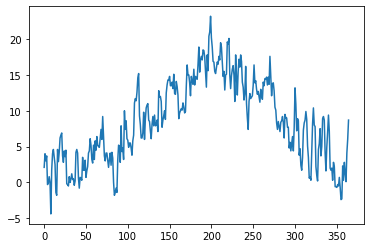

In [8]:
y1901 = dataset[:365]
plt.plot(y1901['Av temp'], label='Av Temp')
plt.show()

In [19]:
def runnian(year):
    flag = False
    if year%4 == 0 and year%100 != 0:
        flag = True
    return flag

def date2index(year, month, day):
    normal = [31,28,31,30,31,30,31,31,30,31,30,31]
    special = [31,29,31,30,31,30,31,31,30,31,30,31]
    if month == 1:
        return int(day - 1)
    else:
        if runnian(year):
            return int(sum(special[0:month-1]) + day - 1)
        else:
            return int(sum(normal[0:month-1]) + day - 1)